In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
file =(r"C:\Users\Dell\OneDrive\Desktop\prodigy\task1\train.csv")
df = pd.read_csv(file)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
df.shape

(1460, 81)

In [33]:
df1=df[['LotArea', 'FullBath', 'HalfBath', 'BedroomAbvGr','SalePrice']]
df1.head()

,LotArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,2,1,3,208500
1,9600,2,0,3,181500
2,11250,2,1,3,223500
3,9550,1,0,3,140000
4,14260,2,1,4,250000


In [34]:
df1.duplicated().sum()

3

In [35]:
df1.drop_duplicates()

,LotArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,2,1,3,208500
1,9600,2,0,3,181500
2,11250,2,1,3,223500
3,9550,1,0,3,140000
4,14260,2,1,4,250000
...,...,...,...,...,...
1455,7917,2,1,3,175000
1456,13175,2,0,3,210000
1457,9042,2,0,4,266500
1458,9717,1,0,2,142125


Text(0.5, 1.0, 'Scatter Relating SalePrice to LotArea')

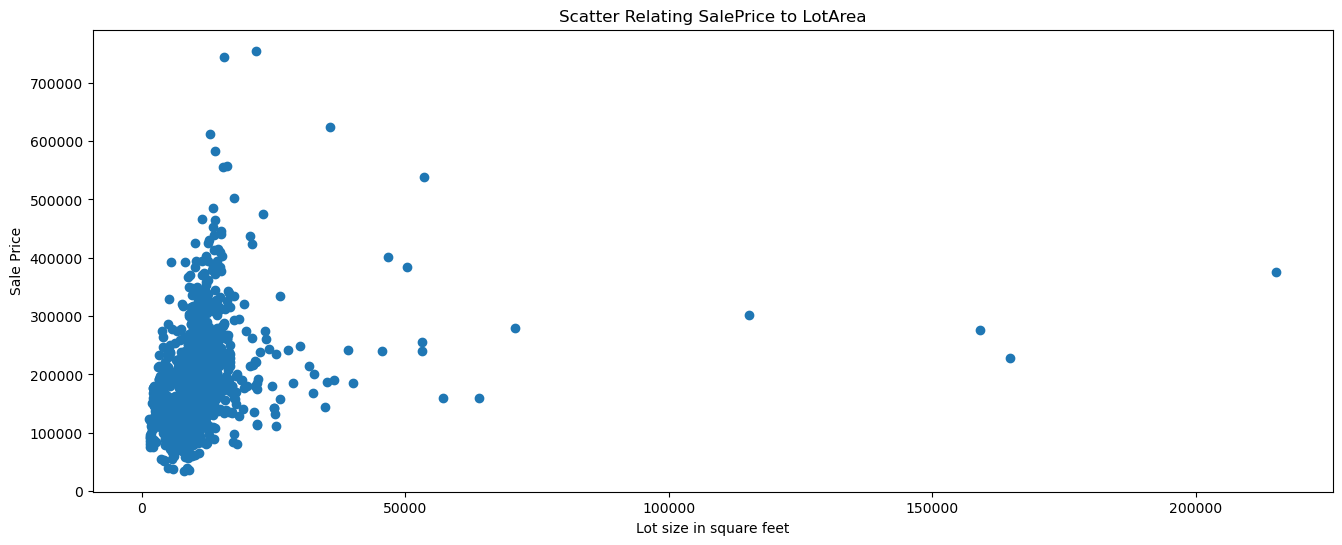

In [36]:
fig, axs = plt.subplots(figsize = (16,6))

axs = plt.scatter(x=df1.LotArea, y=df.SalePrice)
plt.ylabel('Sale Price')
plt.xlabel('Lot size in square feet')
plt.title('Scatter Relating SalePrice to LotArea')

In [57]:
# Outlier reduction for price
Q1 = df1.SalePrice.quantile(0.25)
Q3 = df1.SalePrice.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.SalePrice >= Q1 - 1.5*IQR) & (df1.SalePrice <= Q3 + 1.5*IQR)]
# Outlier reduction for area
Q1 = df1.LotArea.quantile(0.25)
Q3 = df1.LotArea.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.LotArea >= Q1 - 1.5*IQR) & (df1.LotArea <= Q3 + 1.5*IQR)]

# Outlier reduction for area
Q1 = df1.BedroomAbvGr.quantile(0.25)
Q3 = df1.BedroomAbvGr.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[(df1.BedroomAbvGr >= Q1 - 1.5*IQR) & (df1.BedroomAbvGr <= Q3 + 1.5*IQR)]

In [49]:
X = df1.drop('SalePrice',axis=1)
y = df1['SalePrice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=33)

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = lr_model.predict(X_test)
print(y_pred)

[117321.50159374 212420.65042804 181015.80247817 140738.80073797
 212660.73757229 238406.92475168 122372.13420288 167573.1903672
 227156.76075329 114911.82757135 190230.05161521 155726.7852233
 194589.52870817 185485.17147491 224090.14925512 205829.39790869
 204500.25916496 127266.16383186 197322.70063829 142425.72883046
 224368.14489583 141471.6983362  221209.10352412 221274.76884871
 197839.50773543 151388.74687574 104852.0907554  226196.55530582
 165797.8091163  185173.10092333 131316.05487039 129799.71501197
 144145.73955464 164043.09086175 129909.60691576 221664.00548165
 186214.23548756 220017.32725323 192681.46771966  99122.93879557
 156198.37346206 147197.3735197  208088.93016321  98832.30698937
 173335.28182919 194576.89254268 185737.89478465 130459.28011444
 195619.37619534 105989.34564922 114029.78048442 198159.02892804
 147908.83237255 206572.59030479 190478.94133936 204180.37831266
 123553.61567589 207473.23198026 288102.83877387 100303.07118015
 135760.15153616 113499.061

In [51]:
r2 = round(r2_score(y_test,y_pred),5)
print('Coefficient of determination R2: ', r2)

Coefficient of determination R2:  0.48489


Text(0.5, 1.0, 'Scatter chart - Linear regression model')

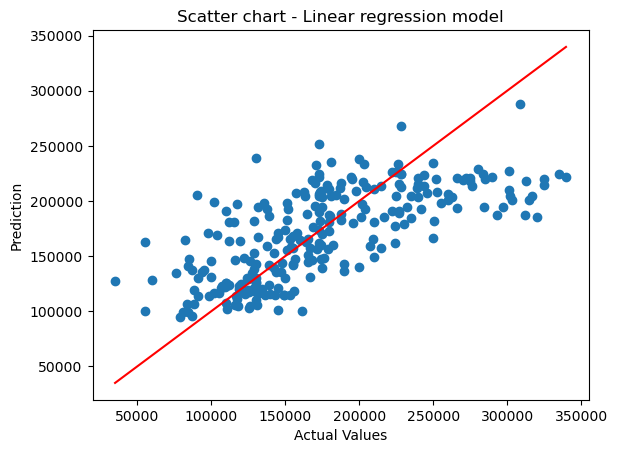

In [59]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')
plt.xlabel('Actual Values')
plt.ylabel('Prediction')
plt.title('Scatter chart - Linear regression model')